In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_helpers import load_data, clean_data, export_data
from chart_helpers import (plot_for_region, stats_for_region, 
    plot_growth_factor_for_region, plot_cfr_for_region,
    growth_factor_stats_for_region, cfr_stats_for_region,
    plot_lin_reg_for_cfr_for_region)

plt.style.use('seaborn-darkgrid')

In [2]:
# Data for confirmed cases, deaths and recovered instances  
# is separated into three files for this data repo:
DATA_BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{}_global.csv'

COUNTRY = 'Bhutan'

In [3]:
raw_data = load_data(DATA_BASE_URL)
data = {key: clean_data(df) for key, df in raw_data.items()}

## Corona stats per region

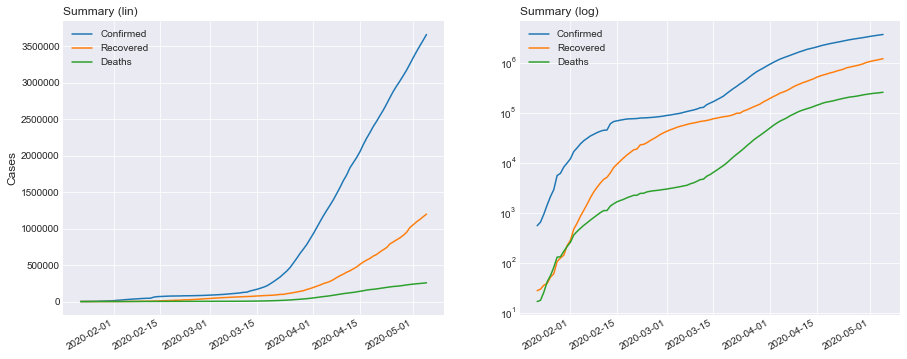

In [4]:
plot_for_region(data, region='Global')

In [5]:
stats_for_region(data, 'Global')

,Confirmed,Recovered,Deaths
Global,"3,662,691","1,198,832","257,239"


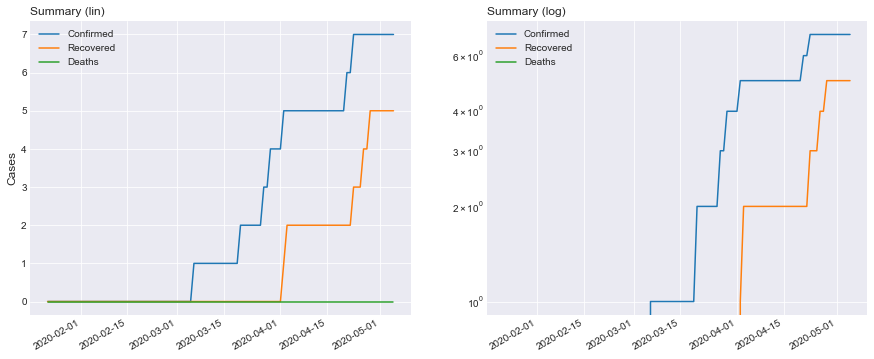

In [6]:
plot_for_region(data, COUNTRY)

In [7]:
stats_for_region(data, COUNTRY)

,Confirmed,Recovered,Deaths
Bhutan,7,5,0


## Growth Factor

How fast is the population of infected growing for a given region?

Growth factor $= \frac {\Delta N_d}{\Delta N_{d-1}}$

New cases of one day divided by the new cases of the previous day.

During exponential growth the factor stays consistently above 1. As you reach the inflection point of a logistic curve (which describes growth in a biological population) the growth factor will become closer to 1 and eventually fall below it. 

[Exponential growth and epidemics (3Blue1Brown on Youtube)](https://www.youtube.com/watch?v=Kas0tIxDvrg)

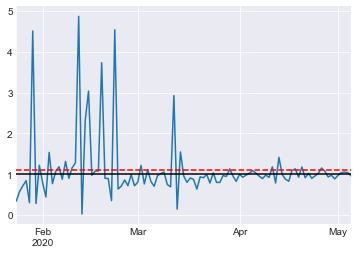

In [8]:
plot_growth_factor_for_region(data, 'Global')

In [9]:
growth_factor_stats_for_region(data, 'Global')

,Current,Mean
Global,0.958436,1.103209


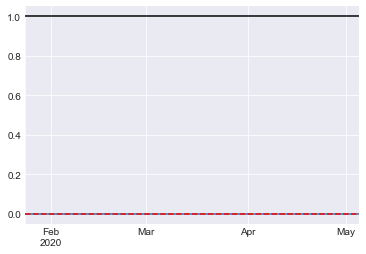

In [10]:
plot_growth_factor_for_region(data, COUNTRY)

In [11]:
growth_factor_stats_for_region(data, COUNTRY)

,Current,Mean
Bhutan,0.0,0.0


## Case Fatality Rate

The case fatality rate (CFR) represents the proportion of cases who eventually die from a disease.
Once an epidemic has ended, it is calculated with the formula: 
    
CFR $= \frac {deaths}{cases}$

But while an epidemic is still ongoing, as it is the case with the current novel coronavirus outbreak, this formula is, at the very least, "naïve" and can be "misleading if, at the time of analysis, the outcome is unknown for a non negligible proportion of patients."

In other words, current deaths belong to a total case figure of the past, not to the current case figure in which the outcome (recovery or death) of a proportion (the most recent cases) hasn't yet been determined.

The correct formula, therefore, would appear to be:

CFR $= \frac {deaths_i}{cases_{i-T}}$

[Coronavirus (COVID-19) Mortality Rate](https://www.worldometers.info/coronavirus/coronavirus-death-rate/)

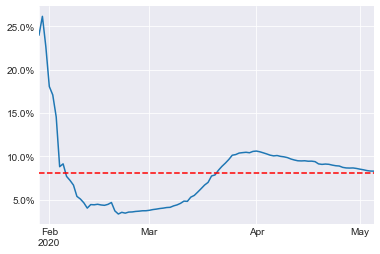

In [12]:
plot_cfr_for_region(data, 'Global', t=7)

In [13]:
cfr_stats_for_region(data, 'Global', t=7)

,Current,Mean
Global,8.31%,8.04%


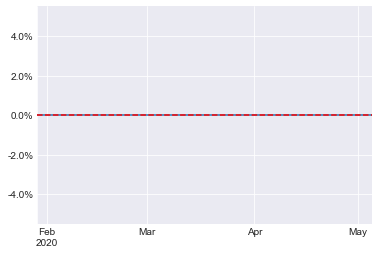

In [14]:
plot_cfr_for_region(data, COUNTRY, t=7)

In [15]:
cfr_stats_for_region(data, COUNTRY, t=7)

,Current,Mean
Bhutan,0.00%,0.00%


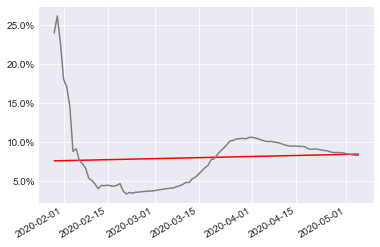

In [16]:
plot_lin_reg_for_cfr_for_region(data, 'Global', t=7)

Could not calculate CFR Linear Regression for this region.


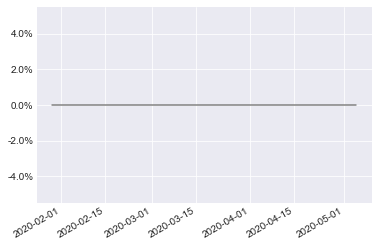

In [17]:
plot_lin_reg_for_cfr_for_region(data, COUNTRY, t=7)

In [18]:
export_data(data)

Exported stats [ 20200506_stats.json ].
Exported growth_factor [ 20200506_growth_factor.json ].
Exported cfr [ 20200506_cfr.json ].
Failed to call "export_cfr_lin_reg()" for region "Bhutan".
Failed to call "export_cfr_lin_reg()" for region "Cambodia".
Failed to call "export_cfr_lin_reg()" for region "Central African Republic".
Failed to call "export_cfr_lin_reg()" for region "Comoros".
Failed to call "export_cfr_lin_reg()" for region "Dominica".
Failed to call "export_cfr_lin_reg()" for region "Eritrea".
Failed to call "export_cfr_lin_reg()" for region "Fiji".
Failed to call "export_cfr_lin_reg()" for region "Grenada".
Failed to call "export_cfr_lin_reg()" for region "Holy See".
Failed to call "export_cfr_lin_reg()" for region "Laos".
Failed to call "export_cfr_lin_reg()" for region "Madagascar".
Failed to call "export_cfr_lin_reg()" for region "Mongolia".
Failed to call "export_cfr_lin_reg()" for region "Mozambique".
Failed to call "export_cfr_lin_reg()" for region "Namibia".
Failed t

In [20]:
from stats_helpers import (growth_factor_for_region, 
                           cfr_for_region, lin_reg_for_time_series)

cfr_df = cfr_for_region(data, 'Germany', t=7)
out = lin_reg_for_time_series(cfr_df)
out[0]

2020-03-09    0.008800
2020-03-10    0.009458
2020-03-11    0.010116
2020-03-12    0.010774
2020-03-13    0.011432
2020-03-14    0.012090
2020-03-15    0.012748
2020-03-16    0.013406
2020-03-17    0.014064
2020-03-18    0.014722
2020-03-19    0.015380
2020-03-20    0.016038
2020-03-21    0.016696
2020-03-22    0.017354
2020-03-23    0.018012
2020-03-24    0.018670
2020-03-25    0.019329
2020-03-26    0.019987
2020-03-27    0.020645
2020-03-28    0.021303
2020-03-29    0.021961
2020-03-30    0.022619
2020-03-31    0.023277
2020-04-01    0.023935
2020-04-02    0.024593
2020-04-03    0.025251
2020-04-04    0.025909
2020-04-05    0.026567
2020-04-06    0.027225
2020-04-07    0.027883
2020-04-08    0.028541
2020-04-09    0.029199
2020-04-10    0.029857
2020-04-11    0.030516
2020-04-12    0.031174
2020-04-13    0.031832
2020-04-14    0.032490
2020-04-15    0.033148
2020-04-16    0.033806
2020-04-17    0.034464
2020-04-18    0.035122
2020-04-19    0.035780
2020-04-20    0.036438
2020-04-21 